In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, gamma, expon, entropy
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from scipy.stats import norm, gamma, expon, rayleigh, invgamma, entropy


FUNCTION FOR FITTING INTO DISTRIBUTIONS

In [ ]:

def fit_and_plot_distributions(data):
    if isinstance(data, pd.Series):
          data = data.values
    # Normalize data
    data_normalized = (data - np.mean(data)) / np.std(data)
    x = np.linspace(min(data_normalized), max(data_normalized), 1000)
    # Compute empirical histogram as PDF
    data_histogram, bins = np.histogram(data_normalized, bins=1000, density=True)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])



    # Gaussian
    gaussian_params = norm.fit(data_normalized)
    gaussian_pdf = norm.pdf(x, *gaussian_params)

    # Gamma
    gamma_params = gamma.fit(data_normalized)
    gamma_pdf = gamma.pdf(x, *gamma_params)

    # Exponential
    exponential_params = expon.fit(data_normalized)
    exponential_pdf = expon.pdf(x, *exponential_params)
    # Rayleigh
    rayleigh_params = rayleigh.fit(data_normalized)
    rayleigh_pdf = rayleigh.pdf(bin_centers, *rayleigh_params)

    # Inverse Gamma
    invgamma_params = invgamma.fit(data_normalized)
    invgamma_pdf = invgamma.pdf(bin_centers, *invgamma_params)

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.hist(data, bins='auto', alpha=0.5, label='Data Histogram', density=True)

    plt.plot(x, gaussian_pdf, label='Gaussian', linewidth=2)
    plt.plot(x, gamma_pdf, label='Gamma', linewidth=2)
    plt.plot(x, exponential_pdf, label='Exponential', linewidth=2)
    plt.plot(x, rayleigh_pdf, label='rayleigh', linewidth=2)
    plt.plot(x, invgamma_pdf, label='invgamma', linewidth=2)
    plt.legend()
    plt.title('Fit of Various Distributions')
    plt.xlabel('Data Points')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()


KL SCORES CHECK

In [ ]:
def fit_distributions(data):
    if isinstance(data, pd.Series):
          data = data.values
    data_normalized = (data - np.mean(data)) / np.std(data)
    x = np.linspace(min(data_normalized), max(data_normalized), 1000)

    # Compute empirical histogram as PDF
    data_histogram, bins = np.histogram(data_normalized, bins=1000, density=True)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Bin centers

    # Gaussian
    gaussian_params = norm.fit(data_normalized)
    gaussian_pdf = norm.pdf(bin_centers, *gaussian_params)

    # Gamma
    gamma_params = gamma.fit(data_normalized)
    gamma_pdf = gamma.pdf(bin_centers, *gamma_params)

    # Exponential
    exponential_params = expon.fit(data_normalized)
    exponential_pdf = expon.pdf(bin_centers, *exponential_params)
    # Rayleigh
    rayleigh_params = rayleigh.fit(data_normalized)
    rayleigh_pdf = rayleigh.pdf(bin_centers, *rayleigh_params)

    # Inverse Gamma
    invgamma_params = invgamma.fit(data_normalized)
    invgamma_pdf = invgamma.pdf(bin_centers, *invgamma_params)


    # Calculate KL Divergence - ensure the comparison uses same bins
    kl_scores = {
        'Gaussian': entropy(data_histogram, gaussian_pdf),
        'Gamma': entropy(data_histogram, gamma_pdf),
        'Exponential': entropy(data_histogram, exponential_pdf),
        'Rayleigh': entropy(data_histogram, rayleigh_pdf),
        'Inverse Gamma': entropy(data_histogram, invgamma_pdf)
    }
    return kl_scores

In [ ]:

data = pd.read_csv('/content/drive/MyDrive/mbsa_pro/harsha/2024-04-03_06-46-56/Magnetometer_h.csv')
dat=data['y']
data=data['x']



COMPARISION OF 2D PDF VS PRODUCT OF PDF`S

In [ ]:
product_pdf=dat*data
plt.hist(product_pdf, bins=30, alpha=0.5, label='product pdf', density=True)
plt.hist(dat, bins=30, alpha=0.5, label='Data Histogram y', density=True)
plt.hist(data, bins=30, alpha=0.5, label='Data Histogram x', density=True)
plt.legend()

In [ ]:
# Fit distributions and plot
fit_and_plot_distributions(data)
fit_and_plot_distributions(dat)


In [ ]:
kl_scores = fit_distributions(data)

# Determine the best model
best_fit = min(kl_scores, key=kl_scores.get)

print("KL Divergence Scores:", kl_scores)
print("Best fitting distribution:", best_fit)

KL Divergence Scores: {'Gaussian': 0.9649996442708494, 'Gamma': 0.7902272088859512, 'Exponential': 0.7289786621239421, 'Rayleigh': 0.8779075528088707, 'Inverse Gamma': 0.5009555170878137}
Best fitting distribution: Inverse Gamma


In [ ]:
kl_scores1 = fit_distributions(dat)

# Determine the best model
best_fit1 = min(kl_scores1, key=kl_scores1.get)

print("KL Divergence Scores:", kl_scores1)
print("Best fitting distribution:", best_fit1)

KL Divergence Scores: {'Gaussian': 0.5173069957316323, 'Gamma': 0.5164007478440453, 'Exponential': 1.174113836492504, 'Rayleigh': 0.7206293520376046, 'Inverse Gamma': 0.511904548011997}
Best fitting distribution: Inverse Gamma


ESTIMATION USING MLE AND MOM FOR FINDING BETTER ESTIMATOR

In [ ]:
from sklearn.utils import resample
n_bootstrap = 1000
# Storage for estimates
estimates_mom = []
estimates_mle = []
for _ in range(n_bootstrap):
    # Resample the data
    sample = resample(data)

    #mom
    sample_mean = np.mean(sample)
    sample_var = np.var(sample)
    estimates_mom.append((sample_mean, sample_var))

    # Maximum Likelihood Estimation (MLE)
    # Fit using scipy's invgamma fitting, fixing location to zero
    mue,vari = norm.fit(data)
    estimates_mle.append((mue,vari))

In [ ]:
estimates_mom1= []
estimates_mle1 = []
n_bootstrap = 1000
# Storage for estimates
estimates_mom1 = []
estimates_mle1 = []
for _ in range(n_bootstrap):
    # Resample the data
    sample1 = resample(dat)

    #mom
    sample_mean1 = np.mean(sample1)
    sample_var1 = np.var(sample1)
    estimates_mom1.append((sample_mean1, sample_var1))

    # Maximum Likelihood Estimation (MLE)
    # Fit using scipy's invgamma fitting, fixing location to zero
    mue1,vari1 = norm.fit(dat)
    estimates_mle1.append((mue1,vari1))

In [ ]:
estimates_mom = np.array(estimates_mom)
estimates_mle = np.array(estimates_mle)
estimates_mom1 = np.array(estimates_mom1)
estimates_mle1 = np.array(estimates_mle1)


ESTIMATOR COMPARISON PLOTS

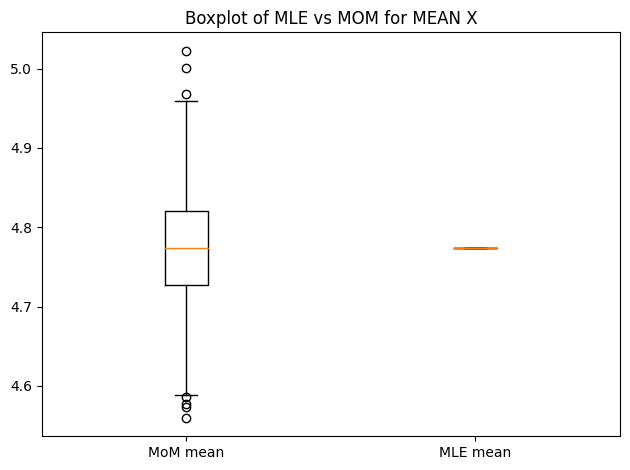

In [ ]:
# Boxplot for visual comparison

plt.boxplot([estimates_mom[:, 0], estimates_mle[:, 0]], labels=['MoM mean', 'MLE mean'])
plt.title('Boxplot of MLE vs MOM for MEAN X')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot of MLE vs MOM for VARIANCE X')

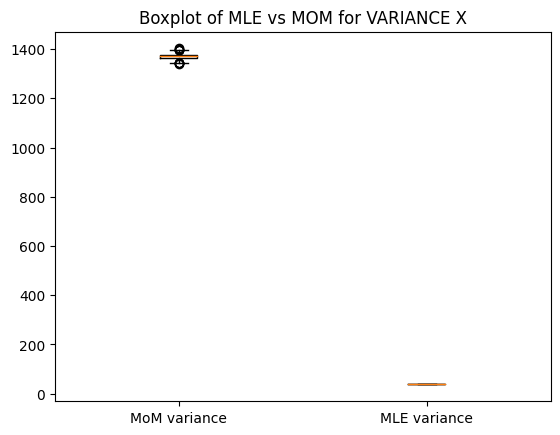

In [ ]:
plt.boxplot([estimates_mom[:, 1], estimates_mle[:, 1]], labels=['MoM variance', 'MLE variance'])
plt.title('Boxplot of MLE vs MOM for VARIANCE X')

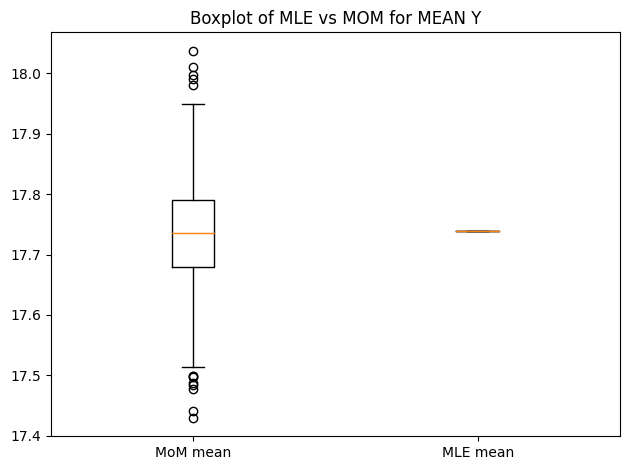

In [ ]:
# Boxplot for visual comparison

plt.boxplot([estimates_mom1[:, 0], estimates_mle1[:, 0]], labels=['MoM mean', 'MLE mean'])
plt.title('Boxplot of MLE vs MOM for MEAN Y')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot of MLE vs MOM for VARIANCE Y')

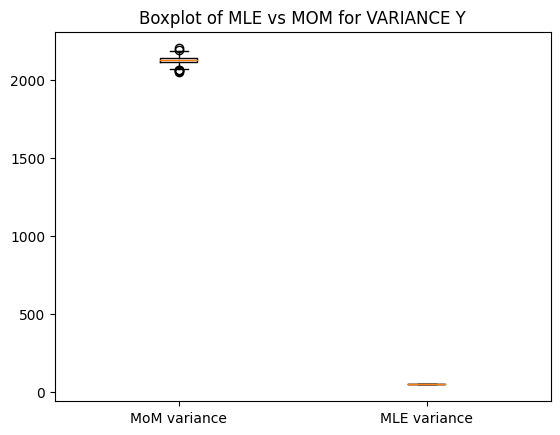

In [ ]:
plt.boxplot([estimates_mom1[:, 1], estimates_mle1[:, 1]], labels=['MoM variance', 'MLE variance'])
plt.title('Boxplot of MLE vs MOM for VARIANCE Y')


MLE ESTIMATION FOR THE DATASETS

In [ ]:

# Fit a normal distribution to the data
mu, sigma = norm.fit(data)

print("Estimated parameters for the Gaussian distribution:")
print("Mean (mu):", mu)
print("Standard Deviation (sigma):", sigma)
with open('mu_mle.txt', 'a') as f6:
    f6.write(f"{mu}\n")

with open('sigma_mle.txt', 'a') as f7:
    f7.write(f"{sigma}\n")

Estimated parameters for the Gaussian distribution:
Mean (mu): 4.773231861833772
Standard Deviation (sigma): 37.01569838833127


In [ ]:
mu_1, sigma_1 = norm.fit(dat)

print("Estimated parameters for the Gaussian distribution:")
print("Mean (mu):", mu_1)
print("Standard Deviation (sigma):", sigma_1)
with open('mu_mle1.txt', 'a') as f1:
    f1.write(f"{mu_1}\n")

with open('sigma_mle1.txt', 'a') as f2:
    f2.write(f"{sigma_1}\n")

Estimated parameters for the Gaussian distribution:
Mean (mu): 17.738468923535574
Standard Deviation (sigma): 46.157207352798515


In [ ]:
filename = "mu_mle.txt"
means_x = []  # Create an empty list to store the values

with open(filename, "r") as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        if line:  # This checks if the line is not empty
            # Convert line to an integer or float if necessary
            try:
                converted_value = float(line)  # Use int(line) if the data should be integer
                means_x.append(converted_value)
            except ValueError:
                print(f"Could not convert {line} to a number")


Text(0.5, 1.0, 'mean of the data x-axis')

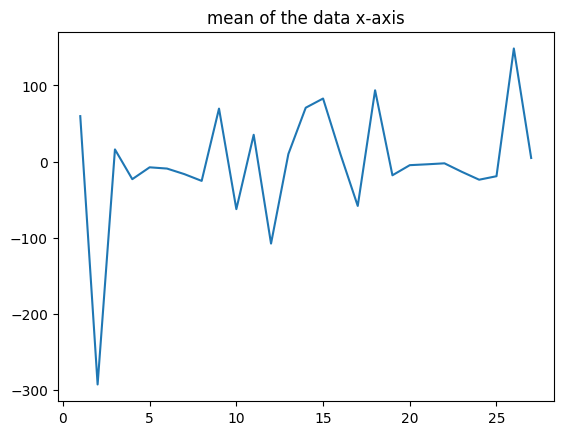

In [ ]:
l = list(range(1, len(means_x) + 1))
plt.plot(l,means_x)
plt.title('mean of the data x-axis')

In [ ]:
filename2 = "sigma_mle.txt"
variance_x = []  # Create an empty list to store the values

with open(filename2, "r") as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        if line:  # This checks if the line is not empty
            # Convert line to an integer or float if necessary
            try:
                converted_value = float(line)  # Use int(line) if the data should be integer
                variance_x.append(converted_value)
            except ValueError:
                print(f"Could not convert {line} to a number")

Text(0.5, 1.0, 'variance of the data X axis')

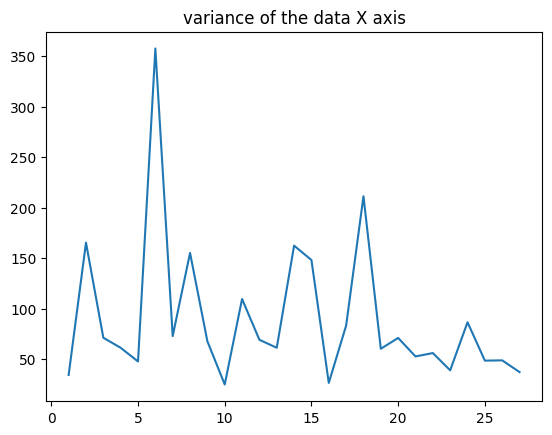

In [ ]:

plt.plot(l,variance_x)
plt.title('variance of the data X axis')

In [ ]:
filename3 = "mu_mle1.txt"
means_y = []  # Create an empty list to store the values

with open(filename3, "r") as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        if line:  # This checks if the line is not empty
            # Convert line to an integer or float if necessary
            try:
                converted_value = float(line)  # Use int(line) if the data should be integer
                means_y.append(converted_value)
            except ValueError:
                print(f"Could not convert {line} to a number")

Text(0.5, 1.0, 'mean of the data y axis')

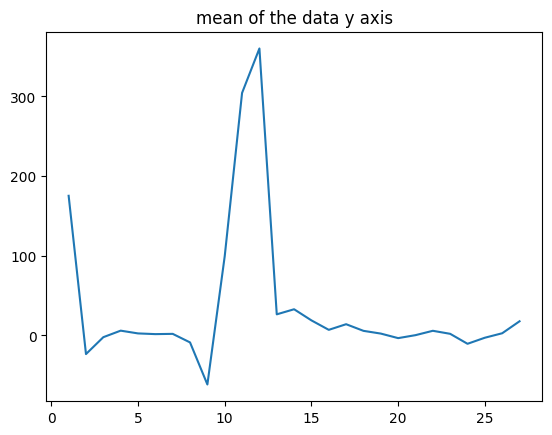

In [ ]:

plt.plot(l,means_y)
plt.title('mean of the data y axis')

In [ ]:
filename4 = "sigma_mle1.txt"
variance_y = []  # Create an empty list to store the values

with open(filename4, "r") as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        if line:  # This checks if the line is not empty
            # Convert line to an integer or float if necessary
            try:
                converted_value = float(line)  # Use int(line) if the data should be integer
                variance_y.append(converted_value)
            except ValueError:
                print(f"Could not convert {line} to a number")

Text(0.5, 1.0, 'variance of the data Y axis')

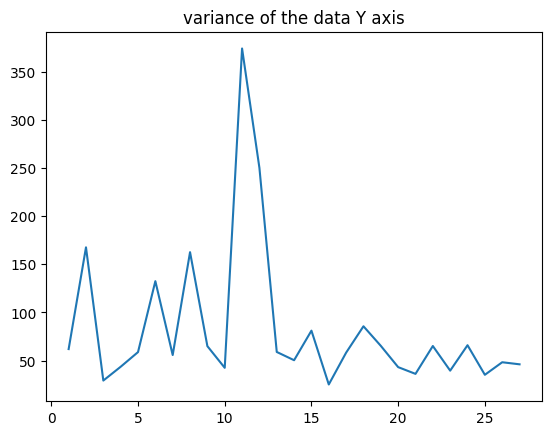

In [ ]:
plt.plot(l,variance_y)
plt.title('variance of the data Y axis')

CORRELATION BETWEEN X AND Y AXIS

In [ ]:
pearson_corr = data.corr(dat)
print("Pearson correlation:", pearson_corr)


Pearson correlation: -0.0654498330610143


In [ ]:
d = np.stack((data,dat), axis=0)


cov_matrix = np.cov(d)
print(cov_matrix)
cov_xy = cov_matrix[0, 1]
var_x = cov_matrix[0, 0]
var_y = cov_matrix[1, 1]


correlation = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))
print(correlation)

[[5046.68102842 -136.25172356]
 [-136.25172356  858.73876233]]
-0.0654498330610143
